In [1]:
import requests
import json
import pandas as pd
from getpass import getpass
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import os
from getpass import getpass
import geopandas as gpd
from cartoframes.viz import Map, Layer, popup_element
from dotenv import load_dotenv
import time
from pymongo import MongoClient

In [2]:
client = MongoClient("localhost:27017")

In [3]:
db = client["ironhack"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ironhack')

In [4]:
db.list_collection_names()

['nyneigh', 'nyrest', 'companies', 'restaurants']

In [5]:
c = db.get_collection("companies")

In [6]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [7]:
category = c.distinct("category_code")
print(category)

[None, 'advertising', 'analytics', 'automotive', 'biotech', 'cleantech', 'consulting', 'design', 'ecommerce', 'education', 'enterprise', 'fashion', 'finance', 'games_video', 'government', 'hardware', 'health', 'hospitality', 'legal', 'local', 'manufacturing', 'medical', 'messaging', 'mobile', 'music', 'nanotech', 'network_hosting', 'news', 'nonprofit', 'other', 'photo_video', 'public_relations', 'real_estate', 'search', 'security', 'semiconductor', 'social', 'software', 'sports', 'transportation', 'travel', 'web']


In [8]:
filter = {"category_code":{"$regex": "ecommerce|games_video|hardware|analytics|design|mobile|software|web"}}
filter_2 = {"offices.country_code": "DEU"}
projection = {"name": 1, "_id": 0, "category_code":1, "total_money_raised": 1, "offices.city":1, "offices.country_code": 1}
comp= list(c.find({
    '$and':
    [filter, filter_2]},projection).sort("total_money_raised", -1))
comp

[{'name': 'Karo Internet',
  'category_code': 'games_video',
  'total_money_raised': '€850k',
  'offices': [{'city': 'Cologne', 'country_code': 'DEU'}]},
 {'name': 'kinkon',
  'category_code': 'web',
  'total_money_raised': '€750k',
  'offices': [{'city': 'Kaiserslautern', 'country_code': 'DEU'}]},
 {'name': 'Moozey',
  'category_code': 'mobile',
  'total_money_raised': '€70k',
  'offices': [{'city': 'Munich', 'country_code': 'DEU'}]},
 {'name': 'Moozey',
  'category_code': 'mobile',
  'total_money_raised': '€70k',
  'offices': [{'city': 'Munich', 'country_code': 'DEU'}]},
 {'name': 'RODECO ICT Services',
  'category_code': 'web',
  'total_money_raised': '€600k',
  'offices': [{'city': 'Boskoop', 'country_code': 'NLD'},
   {'city': 'Frankfurt am Main', 'country_code': 'DEU'},
   {'city': 'Bucharest', 'country_code': 'ROM'}]},
 {'name': 'zweitgeist',
  'category_code': 'web',
  'total_money_raised': '€500k',
  'offices': [{'city': 'Hamburg', 'country_code': 'DEU'}]},
 {'name': 'Transins

In [9]:
offices_ = comp[0]["offices"][0]["city"]
offices_

'Cologne'

In [10]:
cities = [] 
for i in range(len(comp)):
    for j in range(len(comp[i]["offices"])):
        cities.append(comp[i]["offices"][j]["city"])

In [11]:
country = [] 
for i in range(len(comp)):
    for j in range(len(comp[i]["offices"])):
        country.append(comp[i]["offices"][j]["country_code"])

In [12]:
df = pd.DataFrame(comp)
#df.drop(columns=["offices"],inplace=True)

In [13]:
df

,name,category_code,total_money_raised,offices
0,Karo Internet,games_video,€850k,"[{'city': 'Cologne', 'country_code': 'DEU'}]"
1,kinkon,web,€750k,"[{'city': 'Kaiserslautern', 'country_code': 'D..."
2,Moozey,mobile,€70k,"[{'city': 'Munich', 'country_code': 'DEU'}]"
3,Moozey,mobile,€70k,"[{'city': 'Munich', 'country_code': 'DEU'}]"
4,RODECO ICT Services,web,€600k,"[{'city': 'Boskoop', 'country_code': 'NLD'}, {..."
...,...,...,...,...
229,Cogniance,software,$0,"[{'city': 'Menlo Park', 'country_code': 'GBR'}..."
230,Pro2col,software,$0,"[{'city': 'Bournemouth', 'country_code': 'GBR'..."
231,Sevenval,mobile,$0,"[{'city': 'berlin', 'country_code': 'DEU'}]"
232,Sauspiel,games_video,$0,"[{'city': 'Berlin', 'country_code': 'DEU'}]"


In [14]:
df2 = pd.DataFrame(cities)
df2

,0
0,Cologne
1,Kaiserslautern
2,Munich
3,Munich
4,Boskoop
...,...
513,"Cheltenham, Glos"
514,Mannheim
515,berlin
516,Berlin


In [15]:
df2 = df2[df2[0].isin(["Berlin", "Hamburg", "Munich"])]

In [16]:
df2 = df2.groupby(0).size().reset_index(name="count")

In [17]:
df2

,0,count
0,Berlin,61
1,Hamburg,24
2,Munich,32


In [19]:
df2=df2.rename(columns={0: "cities"})

In [20]:
df2['tech_companies_per_km2'] = 0
df2.loc[df2['cities'] == 'Berlin', 'tech_companies_per_km2'] = df2['count'][0] / 891.8
df2.loc[df2['cities'] == 'Hamburg', 'tech_companies_per_km2'] = df2['count'][1] / 755.2
df2.loc[df2['cities'] == 'Munich', 'tech_companies_per_km2'] = df2['count'][2] / 310.7

In [21]:
df2=df2.rename(columns={"count": "tech companies per city"})


In [22]:
df2=df2.rename(columns={"tech_companies_per_km2": "tech companies per km2"})

In [23]:
square_berlin = 891,8
square_hamburg = 755,2
square_munich = 310,7

In [24]:
df2

,cities,tech companies per city,tech companies per km2
0,Berlin,61,0.068401
1,Hamburg,24,0.031780
2,Munich,32,0.102993


In [25]:
import matplotlib.pyplot as plt

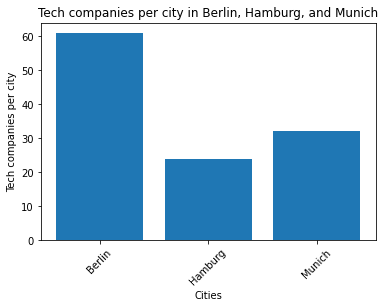

In [26]:
plt.bar(df2['cities'], df2['tech companies per city'])
plt.xlabel('Cities')
plt.ylabel('Tech companies per city')
plt.title('Tech companies per city in Berlin, Hamburg, and Munich')
plt.xticks(rotation=45)
plt.show()

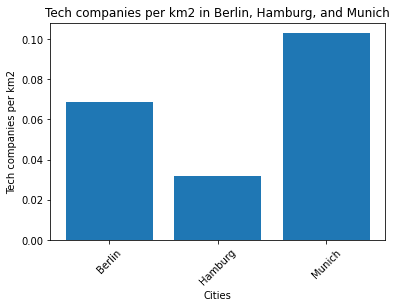

In [27]:
plt.bar(df2['cities'], df2['tech companies per km2'])
plt.xlabel('Cities')
plt.ylabel('Tech companies per km2')
plt.title('Tech companies per km2 in Berlin, Hamburg, and Munich')
plt.xticks(rotation=45)
plt.show()

### **Despite the fact that, according to "companies DataFrame," Berlin has the majority of tech companies, Münich has more companies per square kilometer, which may make the task of finding a suitable location for our tech company easier.**

In [ ]:
# Now we use Foursquare API to find a proper location for our company in Munich

In [28]:
load_dotenv()

True

In [29]:
from getpass import getpass

In [39]:
token = getpass()

In [32]:
where = "Munich, Bayern"

In [83]:
url_geocode = f"https://geocode.xyz/{where}?json=1"
url_geocode

'https://geocode.xyz/Munich, Bayern?json=1'

In [209]:
url = "https://api.foursquare.com/v3/places/search?query=tech&ll=48.1534803%2C10.9675297&limit=30"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3eNrtoknw+NGSx9PZdGz9sArzHk5pYw8A0+Z1xip6xjU="
}

response = requests.get(url, headers=headers)


response

<Response [200]>

In [210]:
len(response.json()["results"])

30

In [211]:
response.json()["results"][0]

{'fsq_id': '4c559a0fb3b09c74b9754db4',
 'categories': [{'id': 11167,
   'name': 'Technology Business',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/technology_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 15656,
 'geocodes': {'main': {'latitude': 48.077324, 'longitude': 11.145268},
  'roof': {'latitude': 48.077324, 'longitude': 11.145268}},
 'link': '/v3/places/4c559a0fb3b09c74b9754db4',
 'location': {'address': 'Seefelder Straße 12 a',
  'country': 'DE',
  'formatted_address': 'Seefelder Straße 12 a, 82266 Inning am Ammersee',
  'locality': 'Inning am Ammersee',
  'postcode': '82266',
  'region': 'Bavaria'},
 'name': 'comPConsult Technologieberatung Horst-F. Schnell',
 'related_places': {},
 'timezone': 'Europe/Berlin'}

In [212]:
coordinates = response.json()["results"][0]["geocodes"]["main"]
coordinates

{'latitude': 48.077324, 'longitude': 11.145268}

In [213]:
lat, lon = coordinates["latitude"], coordinates["longitude"]

In [214]:
name = response.json()["results"][0]["name"]
name

'comPConsult Technologieberatung Horst-F. Schnell'

In [215]:
def name_coordinates (dict_):
    
    processed_dict = {"name": dict_["name"],
                     "lat": dict_["geocodes"]["main"]["latitude"],
                     "lon": dict_["geocodes"]["main"]["longitude"]}
    
    return processed_dict

In [216]:
name_coordinates (response.json()["results"][0])

{'name': 'comPConsult Technologieberatung Horst-F. Schnell',
 'lat': 48.077324,
 'lon': 11.145268}

In [217]:
new_list = []
for i in response.json()["results"]:
    new_list.append(name_coordinates(i))
new_list

[{'name': 'comPConsult Technologieberatung Horst-F. Schnell',
  'lat': 48.077324,
  'lon': 11.145268},
 {'name': 'rumnerden Studio 1', 'lat': 48.310754, 'lon': 10.894805},
 {'name': 'MS-One Schlager Studio', 'lat': 48.344035, 'lon': 10.953076},
 {'name': '9PT Consulting', 'lat': 48.176945, 'lon': 11.255214},
 {'name': 'Gogol Publishing', 'lat': 48.356082, 'lon': 10.896763},
 {'name': 'Commerce Guru', 'lat': 48.366656, 'lon': 10.899859},
 {'name': 'Seowerk', 'lat': 48.361305, 'lon': 10.897543},
 {'name': 'OneBox Media Solutions GmbH', 'lat': 48.363684, 'lon': 10.896092},
 {'name': 'twentyZen Augsburg', 'lat': 48.366818, 'lon': 10.905025},
 {'name': 'Nerdcommunity', 'lat': 48.368785, 'lon': 10.891557},
 {'name': 'It Akademie Bayern', 'lat': 48.383891, 'lon': 10.848552},
 {'name': 'explido Webmarketing - webtec', 'lat': 48.39609, 'lon': 10.924016},
 {'name': 'Bertuleit Media', 'lat': 48.17493, 'lon': 10.755501},
 {'name': 'Stölzel Norbert Dr.jur. Dipl.-Oec. Steuerberater',
  'lat': 48.289

In [218]:
df_munich_tech = pd.DataFrame(new_list)
df_munich_tech

,name,lat,lon
0,comPConsult Technologieberatung Horst-F. Schnell,48.077324,11.145268
1,rumnerden Studio 1,48.310754,10.894805
2,MS-One Schlager Studio,48.344035,10.953076
3,9PT Consulting,48.176945,11.255214
4,Gogol Publishing,48.356082,10.896763
5,Commerce Guru,48.366656,10.899859
6,Seowerk,48.361305,10.897543
7,OneBox Media Solutions GmbH,48.363684,10.896092
8,twentyZen Augsburg,48.366818,10.905025
9,Nerdcommunity,48.368785,10.891557


In [105]:
url_1 = "https://api.foursquare.com/v3/places/search?query=kindergarten&ll=48.1548256%2C11.4017521&limit=30"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3eNrtoknw+NGSx9PZdGz9sArzHk5pYw8A0+Z1xip6xjU="
}

response_1 = requests.get(url_1, headers=headers)
response_1

<Response [200]>

In [ ]:
response_1.json()

In [106]:
coordinates_1 = response.json()["results"][0]["geocodes"]["main"]
coordinates_1

{'latitude': 48.130877, 'longitude': 11.372753}

In [107]:
lat_1, lon_1 = coordinates["latitude"], coordinates["longitude"]

In [108]:
name_1 = response_1.json()["results"][0]["name"]
name_1

'Maria Schutz, Kindergarten Maria Schutz'

In [134]:
def name_coordinates (dict_):
    
    processed_dict = {"Kinder Garden": dict_["name"],
                     "lat": dict_["geocodes"]["main"]["latitude"],
                     "lon": dict_["geocodes"]["main"]["longitude"]}
    
    return processed_dict

In [135]:
name_coordinates (response_1.json()["results"][0])

{'Kinder Garden': 'Maria Schutz, Kindergarten Maria Schutz',
 'lat': 48.14329,
 'lon': 11.455701}

In [136]:
new_list_1 = []
for i in response_1.json()["results"]:
    new_list_1.append(name_coordinates(i))

In [137]:
df_kinderg = pd.DataFrame(new_list_1)
df_kinderg

,Kinder Garden,lat,lon
0,"Maria Schutz, Kindergarten Maria Schutz",48.143290,11.455701
1,Kindergarten Sterntaler,48.178151,11.322819
2,Villa Hand in Hand UG,48.161308,11.413814
3,Haus für Kinder Lucia-Popp-Bogen,48.161314,11.441200
4,Kinderkrippe Denk mit! Zwerge Kinderkrippe,48.128033,11.363737
5,Kinderkrippe Ebenböckstr,48.146058,11.461782
6,Kinderhaus Denk Mit! Zwerge Germering,48.123738,11.356317
7,Elterninitiative Topolinos,48.137556,11.501421
8,Kooperationseinrichtung,48.146078,11.506730
9,Kinderhaus Medienfabrik,48.130498,11.536679


In [163]:

url_2 = "https://api.foursquare.com/v3/places/search?query=Vegan%20essen&ll=48.1548256%2C11.4017521&limit=30"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3eNrtoknw+NGSx9PZdGz9sArzHk5pYw8A0+Z1xip6xjU="
}

response_2 = requests.get(url_2, headers=headers)

In [164]:
response_2.json()
coordinates_2 = response_2.json()["results"][0]["geocodes"]["main"]
coordinates_2

{'latitude': 48.150562, 'longitude': 11.464121}

In [165]:
name_2 = response_2.json()["results"][0]["name"]
name_coordinates (response_2.json()["results"][0])

{'Vegan Restaurants': 'Essence Restaurant & Lounge',
 'lat': 48.150562,
 'lon': 11.464121}

In [166]:
def name_coordinates_2 (dict_):
    
    processed_dict = {"Vegan Restaurants": dict_["name"],
                     "lat": dict_["geocodes"]["main"]["latitude"],
                     "lon": dict_["geocodes"]["main"]["longitude"]}
    
    return processed_dict

In [167]:
name_coordinates_2 (response_2.json()["results"][0])
new_list_2 = []
for i in response_2.json()["results"]:
    new_list_2.append(name_coordinates_2(i))

In [168]:
df_veganr = pd.DataFrame(new_list_2)
df_veganr

,Vegan Restaurants,lat,lon
0,Essence Restaurant & Lounge,48.150562,11.464121
1,"Luja - Essen, Trinken, Feiern",48.256422,11.442483
2,essential media GmbH,48.119717,11.427798
3,Soy Vegan München,48.151992,11.560691
4,Essen im Dunkeln,48.124563,11.363725
5,Veganos,48.159765,11.566550
6,Essenzen und Tinkturen,48.119477,11.365558
7,Veganista,48.146464,11.570527
8,My Vegan Shoes,48.193024,11.366701
9,Schöner Essen Interior e.K.,48.136315,11.575280


In [219]:
munich_map = folium.Map(location=[48.13743, 11.57549], zoom_start=13)


In [ ]:

folium.LayerControl(collapsed=False, position=“topleft”).add_to(munich_map)
munich_map

In [220]:
tech_munich = folium.FeatureGroup(name=f"df_munich_tech({df_munich_tech.shape[0]})")

HeatMap(data = df_munich_tech[["lat", "lon"]]).add_to(tech_munich)

tech_munich.add_to(munich_map)



folium.LayerControl(collapsed=False, position="topleft").add_to(munich_map)
munich_map

In [195]:
vegan_munich = folium.FeatureGroup(name=f"df_veganr({df_veganr.shape[0]})")

HeatMap(data = df_veganr[["lat", "lon"]]).add_to(vegan_munich)

vegan_munich.add_to(munich_map)



folium.LayerControl(collapsed=False, position="topleft").add_to(vegan_munich)
munich_map